# Logistic Regression Model - Identifying Automation Potential of SE Tasks - NLP Approach - BERT Embeddings

#### Loading The Data

In [ ]:
import pandas as pd

data = pd.read_csv("SE_Tasks_Final.csv")
data.head()

,Role,Task,Complexity,Task Type,Creativity,Human Interactions,Time,Frequency,Skill Level,Automation Potential,Automation Probability,Comment
0,Frontend Developer,Designing responsive UI layouts,Medium,Development,4,Yes,Medium,Weekly,Intermediate,Less likely,4,there are many tools to assist with responsive...
1,Frontend Developer,"Writing modular and reusable HTML, CSS, and Ja...",Medium,Development,3,No,Medium,Daily,Intermediate,Likely,7,"AI tools are advancing in code generation, mak..."
2,Frontend Developer,Debugging browser compatibility issues,Medium,Testing,3,No,Medium,Weekly,Intermediate,Likely,6,"AI-powered tools like BrowserStack, Sauce Labs..."
3,Frontend Developer,Ensuring accessibility compliance,Medium,Testing,3,Yes,Medium,Monthly,Intermediate,Likely,7,"tools such as Axe, Google Lighthouse, and Micr..."
4,Frontend Developer,Integrating UI designs from tools like Figma,Medium,Development,3,Yes,Medium,Weekly,Intermediate,Likely,6,tools like Anima and TeleportHQ help automate ...


#### Check The Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Role                    1419 non-null   object
 1   Task                    1419 non-null   object
 2   Complexity              1419 non-null   object
 3   Task Type               1419 non-null   object
 4   Creativity              1419 non-null   object
 5   Human Interactions      1419 non-null   object
 6   Time                    1419 non-null   object
 7   Frequency               1419 non-null   object
 8   Skill Level             1419 non-null   object
 9   Automation Potential    1419 non-null   object
 10  Automation Probability  1419 non-null   int64 
 11  Comment                 1414 non-null   object
dtypes: int64(1), object(11)
memory usage: 133.2+ KB


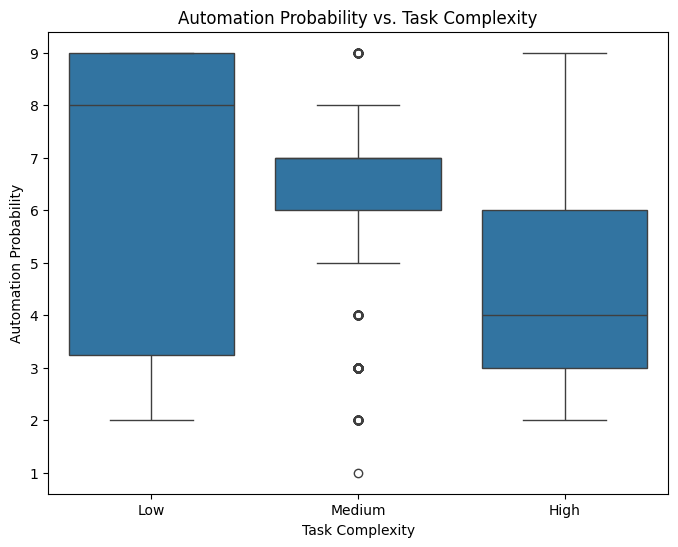

In [ ]:
# plot the complexity against the automation probability

import matplotlib.pyplot as plt
import seaborn as sns

complexity_order = ['Low', 'Medium', 'High']
data_orig = data.copy()
data_orig['Complexity'] = pd.Categorical(data_orig['Complexity'], categories=complexity_order, ordered=True)

plt.figure(figsize=(8,6))
sns.boxplot(x="Complexity", y="Automation Probability", data=data_orig)
plt.title("Automation Probability vs. Task Complexity")
plt.xlabel("Task Complexity")
plt.ylabel("Automation Probability")
plt.show()

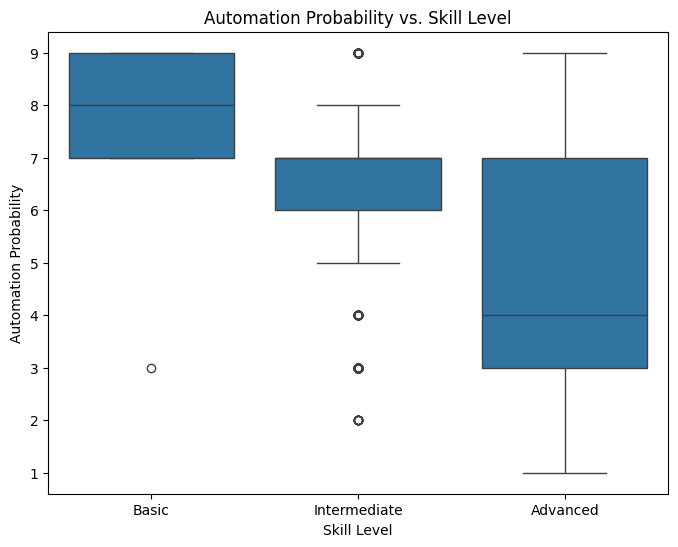

In [ ]:
# plot the skill against the automation probability

import matplotlib.pyplot as plt
import seaborn as sns

complexity_order = ['Basic', 'Intermediate', 'Advanced']
data_orig = data.copy()
data_orig['Skill Level'] = pd.Categorical(data_orig['Skill Level'], categories=complexity_order, ordered=True)

plt.figure(figsize=(8,6))
sns.boxplot(x="Skill Level", y="Automation Probability", data=data_orig)
plt.title("Automation Probability vs. Skill Level")
plt.xlabel("Skill Level")
plt.ylabel("Automation Probability")
plt.show()

#### Rename And Refactor

In [ ]:
# drop the role column
data.drop(columns=['Role','Complexity','Task Type','Creativity','Human Interactions','Time','Frequency','Skill Level','Comment'], inplace=True)

data.head()

,Task,Automation Potential,Automation Probability
0,Designing responsive UI layouts,Less likely,4
1,"Writing modular and reusable HTML, CSS, and Ja...",Likely,7
2,Debugging browser compatibility issues,Likely,6
3,Ensuring accessibility compliance,Likely,7
4,Integrating UI designs from tools like Figma,Likely,6


In [ ]:
# rename the columns
data.rename(columns={'Task':'task_description'}, inplace=True)
data.rename(columns={'Automation Potential':'automation_potential'}, inplace=True)
data.rename(columns={'Automation Probability':'automation_probability'}, inplace=True)

data.head()

,task_description,automation_potential,automation_probability
0,Designing responsive UI layouts,Less likely,4
1,"Writing modular and reusable HTML, CSS, and Ja...",Likely,7
2,Debugging browser compatibility issues,Likely,6
3,Ensuring accessibility compliance,Likely,7
4,Integrating UI designs from tools like Figma,Likely,6


In [ ]:
import re

# converting task description to lowercase
data['task_description'] = data['task_description'].str.lower()

def clean_text(text):
    text = re.sub(r'[^a-z0-9\s]', '', text)  # remove punctuation and non-alphanumeric characters
    return text

data['task_description'] = data['task_description'].apply(clean_text)

# convert the automation_potential column to only "Less Likely" and "Likely"
data['automation_potential'] = data['automation_probability'].apply(lambda x: "Less Likely" if x < 5 else "Likely")

# convert the automation_potential column to only 1s and 0s
data['automation_potential'] = data['automation_potential'].map({'Less Likely':0, 'Likely':1})

data.head()

,task_description,automation_potential,automation_probability
0,designing responsive ui layouts,0,4
1,writing modular and reusable html css and java...,1,7
2,debugging browser compatibility issues,1,6
3,ensuring accessibility compliance,1,7
4,integrating ui designs from tools like figma,1,6


In [ ]:
# dropping the duplicates
data.drop_duplicates(inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1417 entries, 0 to 1418
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   task_description        1417 non-null   object
 1   automation_potential    1417 non-null   int64 
 2   automation_probability  1417 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 44.3+ KB


<Axes: xlabel='automation_potential'>

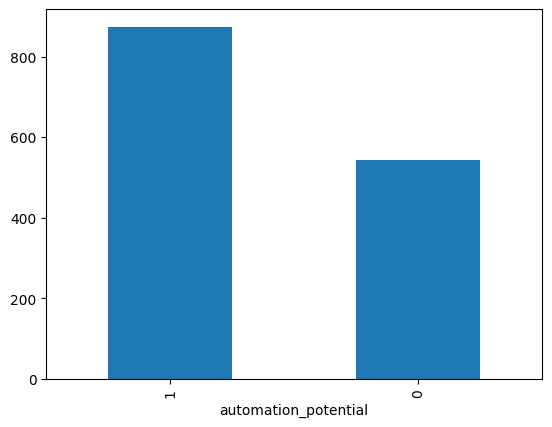

In [ ]:
# checking the value balance
value_balance = data['automation_potential'].astype("category", copy=False)
value_balance.value_counts().plot(kind='bar')

In [ ]:
# dropping the probability column

data.drop(columns=['automation_probability'], inplace=True)

data.head()

,task_description,automation_potential
0,designing responsive ui layouts,0
1,writing modular and reusable html css and java...,1
2,debugging browser compatibility issues,1
3,ensuring accessibility compliance,1
4,integrating ui designs from tools like figma,1


In [ ]:
# export cleaned dataset

data.to_csv('software_engineering_tasks_cleaned.csv', index=False)

#### Using pre trained BERT model

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

def generate_bert_embeddings(text, tokenizer, model):
  inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
  with torch.no_grad():
    outputs = model(**inputs)
  cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
  return cls_embedding

data['bert_embedding'] = data['task_description'].apply(lambda x: generate_bert_embeddings(x, tokenizer, bert_model))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

#### Training The Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = np.array(data['bert_embedding'].tolist())
y = data['automation_potential']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, predictions)
print(report)

Accuracy: 0.8028169014084507
              precision    recall  f1-score   support

           0       0.76      0.73      0.75       112
           1       0.83      0.85      0.84       172

    accuracy                           0.80       284
   macro avg       0.79      0.79      0.79       284
weighted avg       0.80      0.80      0.80       284



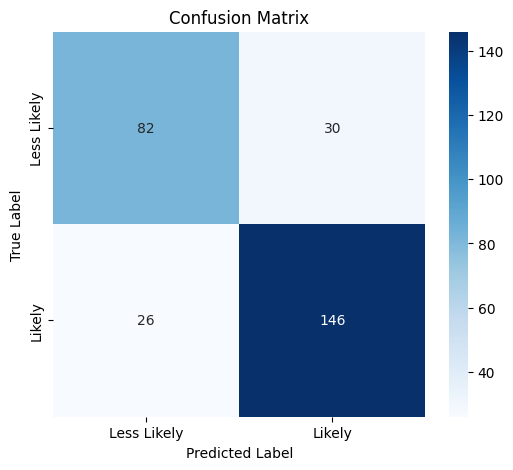

In [ ]:
# printing out the confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Less Likely', 'Likely'],
            yticklabels=['Less Likely', 'Likely'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Test With New Data

In [ ]:
new_task = "proposing technical architectures"

new_task_vector = generate_bert_embeddings(new_task, tokenizer, bert_model)

prediction = model.predict([new_task_vector])

print(f"Prediction: {'Likely' if prediction[0] == 1 else 'Less Likely'}")

Prediction: Less Likely


In [ ]:
# exporting the model

